In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
import sys
sys.path.append("../")
from delivery import *
from delivery import run_episode, run_n_episodes
from Env import DeliveryEnvironment
from qagent import QAgent
import pymongo
from route_db import Storage
import datetime


%matplotlib inline
%load_ext autoreload
%autoreload 2

### Point of interests

In [5]:
n_points = 30
max_box = 10
n_stops = 20
n_samples = 2

pois = np.random.rand(n_points, 2) * max_box

### Simple TSP route gen

TSP_20
Initialized Delivery Environment with 20 random stops
Target metric for optimization is distance
else distance


episod: 0
episod: 100



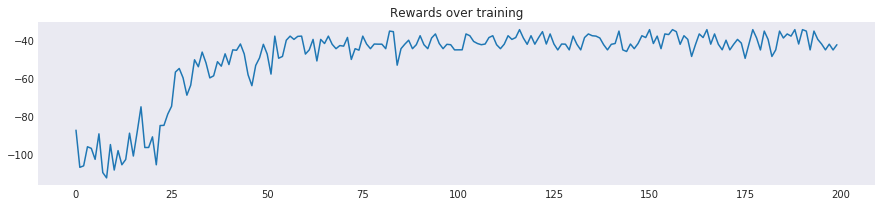

Initialized Delivery Environment with 20 random stops
Target metric for optimization is distance
else distance


episod: 0
episod: 100



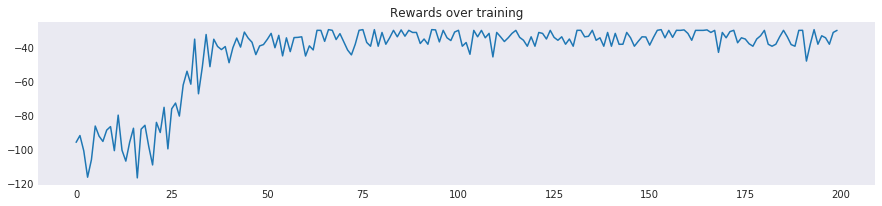

{'_id': ObjectId('5d87f53950041c541d034c9e'), 'input_graph': [19, 12, 24, 22, 25, 13, 7, 3, 0, 29, 11, 28, 16, 23, 26, 2, 14, 10, 21, 6], 'route': [21, 12, 23, 7, 11, 22, 26, 14, 16, 29, 0, 6, 28, 2, 10, 13, 24, 3, 25, 19]}
{'_id': ObjectId('5d87f53b50041c541d034c9f'), 'input_graph': [14, 21, 0, 11, 29, 16, 18, 10, 26, 20, 27, 12, 28, 4, 7, 1, 15, 8, 22, 24], 'route': [4, 18, 7, 11, 22, 12, 21, 1, 0, 15, 29, 14, 26, 16, 27, 20, 8, 28, 10, 24]}
{'_id': ObjectId('5d87f54050041c541d034ca1'), 'input_graph': [17, 28, 7, 12, 14, 26, 13, 10, 21, 2, 6, 4, 27, 23, 29, 20, 18, 22, 24, 16], 'route': [10, 2, 28, 4, 18, 23, 12, 21, 7, 22, 26, 14, 16, 29, 27, 17, 24, 13, 20, 6]}
{'_id': ObjectId('5d87f54250041c541d034ca2'), 'input_graph': [11, 0, 17, 27, 18, 15, 7, 1, 2, 24, 25, 21, 29, 14, 4, 20, 28, 8, 22, 9], 'route': [0, 29, 14, 1, 21, 11, 7, 22, 18, 4, 28, 2, 8, 20, 9, 27, 17, 24, 25, 15]}
{'_id': ObjectId('5d87f56450041c541d034ca4'), 'input_graph': [2, 0, 27, 4, 19, 14, 12, 28, 29, 9, 25, 17, 

In [16]:
dt = datetime.datetime.now().strftime("%d-%H-%M-%S")
# enable database 
st_table = "TSP-20"
print(st_table)
db = Storage(st_table)

for i in range(n_samples):
    task_indices = np.random.choice(n_points, n_stops, replace=False)
    reverse_task_ind = np.column_stack((np.arange(n_stops), task_indices))
    task_locations = pois[task_indices, :]
    # no does_task_exist check
    env = DeliveryEnvironment(n_stops = n_stops, method = "distance", poi = task_locations)
    agent = QAgent(nA=env.action_space, nS=env.observation_space, alpha=0.8, gamma=0.8, eps_start=1, eps_decay=0.95, eps_min=0.01, sars='max')
    env, agent = run_n_episodes(env,agent,"training_50_stops1.gif", n_episodes=200)
    #env.render()
    route_indices = env.stops # need a getter?
    global_route_indices = reverse_task_ind[route_indices,1]
    # add to the database
    
    route_dict = {"input_graph": ','.join(map(str, task_indices.tolist())), "route": ','.join(map(str, global_route_indices.tolist()))}
    res = db.insert_route(route_dict)

db.print_table()    
print('done')

In [42]:
# todo
# generate CSV
csv_path = "path" 
db.generate_csv_from_table(st_table, csv_path)


AttributeError: 'Storage' object has no attribute 'generate_csv_from_table'

In [43]:
db.print_table()

{'_id': ObjectId('5d87cae986b9ae7849c707b8'), 'input_graph': [16, 0, 21, 6, 1, 24, 9, 2, 28, 13, 19, 29, 20, 15, 7, 22, 26, 5, 17, 4], 'route': [2, 15, 17, 28, 19, 29, 9, 21, 1, 16, 26, 7, 0, 6, 22, 4, 24, 5, 20, 13]}
{'_id': ObjectId('5d87caea86b9ae7849c707b9'), 'input_graph': [5, 1, 4, 2, 20, 13, 7, 9, 0, 17, 19, 28, 16, 8, 10, 25, 24, 29, 15, 12], 'route': [0, 7, 8, 12, 16, 1, 5, 24, 4, 20, 13, 25, 29, 10, 9, 19, 28, 17, 2, 15]}
{'_id': ObjectId('5d87cb2186b9ae7849c707bb'), 'input_graph': [12, 8, 29, 13, 6, 24, 27, 5, 4, 20, 25, 17, 14, 26, 15, 7, 10, 21, 2, 28], 'route': [14, 17, 20, 10, 24, 29, 13, 27, 12, 2, 21, 8, 6, 26, 28, 5, 7, 15, 25, 4]}
{'_id': ObjectId('5d87cb2386b9ae7849c707bc'), 'input_graph': [7, 18, 0, 11, 20, 12, 21, 16, 29, 4, 14, 23, 2, 17, 27, 6, 24, 26, 13, 15], 'route': [21, 11, 2, 12, 4, 6, 26, 23, 7, 15, 20, 17, 14, 16, 24, 29, 18, 13, 27, 0]}
